In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# train_test_split jakaa datan opetusdataan ja testidataan
from sklearn.model_selection import train_test_split

# Käytettävät mallit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

OSA 1 - LUOKITTELUMALLI

In [2]:
#ladataan data viineistä

df = pd.read_excel(r"C:\Users\nikla\OneDrive\Työpöytä\Haaga-Helia\Data-analytiikka\Tehtävät\Tehtävä3\wine.xlsx")
df

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
#Lisätään sarakkeille oikeat nimet (Lähde: https://archive.ics.uci.edu/ml/datasets/Wine)

column_names = ['Grape','Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols', 'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'
]
df.columns = column_names
df

,Grape,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
#Rypälelajikkeiden jakuauma

df['Grape'].value_counts()

Grape
2    71
1    59
3    48
Name: count, dtype: int64

<Axes: >

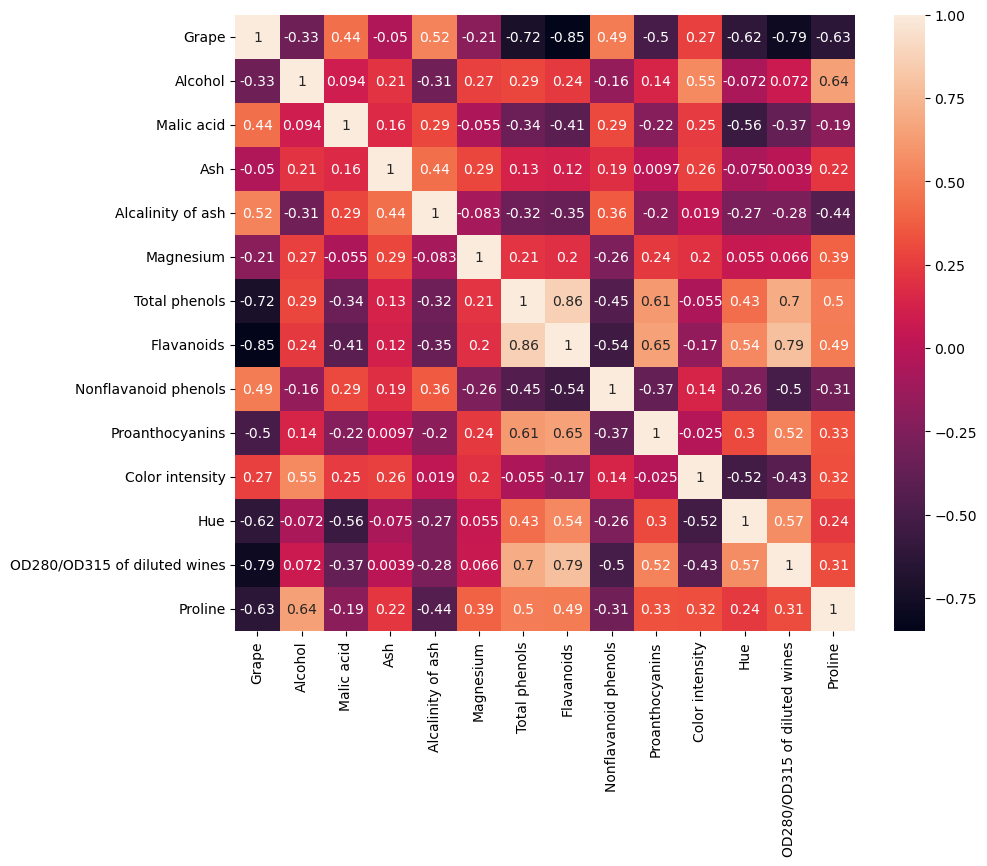

In [5]:
#Korrelaatiot

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

In [6]:
#Suurimmassa osassa muuuttujista on havaittavissa vähintään kohtalaista korrelaatiota. Kokeillaan koko datan käyttöä malleihin

# Selittävät muuttujat
X = df.drop(columns=['Grape'])

# Kohdemuuttuja
y = df['Grape']

# Datan jako opetus- ja testidataan
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [7]:
#Kokeillaan DecisionTreeClassifier eli PÄÄTÖSPUUTA

malli = DecisionTreeClassifier(max_depth=3, random_state=2)
malli.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [8]:
print(f'Mallin tarkkuus opetusdatassa {malli.score(X_train, y_train):.3f}')
print(f'Mallin tarkkuus testidatassa {malli.score(X_test, y_test):.3f}')

Mallin tarkkuus opetusdatassa 0.992
Mallin tarkkuus testidatassa 0.956


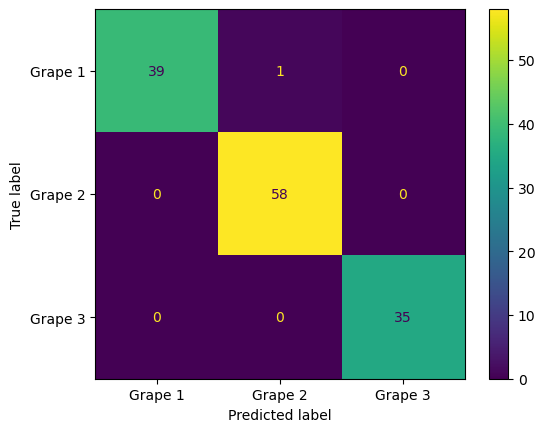

In [9]:
#Confusion Matrix opetusdatalle

y_train_malli = malli.predict(X_train)

cm = confusion_matrix(y_train, y_train_malli)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Grape 1', 'Grape 2', 'Grape 3']).plot()

Opetusdatassa malli ennustaa yhden rypäleen väärin (Grape 1 ennustetaan Grape 2:ksi)

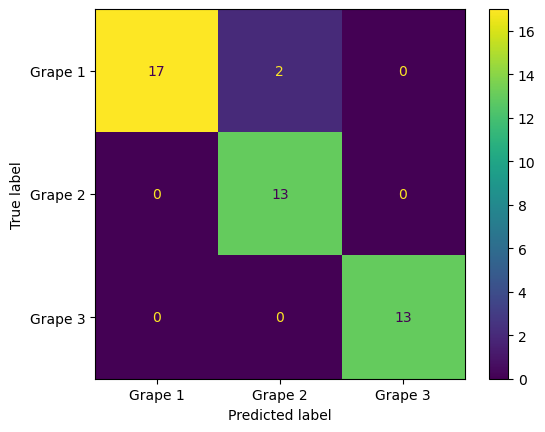

In [10]:
#Confusion matrix testidatalle

y_test_malli = malli.predict(X_test)

cm = confusion_matrix(y_test, y_test_malli)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Grape 1', 'Grape 2', 'Grape 3']).plot()

Testidatassa malli ennustaa kaksi rypälettä väärin (Grape 1 ennustetaan Grape 2:ksi)

GRADIENTTITEHOSTUS

In [11]:
#Kokeillaan GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth=2, random_state=2)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, random_state=2)

In [12]:
print(f'Mallin tarkkuus opetusdatassa {gbc.score(X_train, y_train):.3f}')
print(f'Mallin tarkkuus testidatassa {gbc.score(X_test, y_test):.3f}')

Mallin tarkkuus opetusdatassa 1.000
Mallin tarkkuus testidatassa 0.933


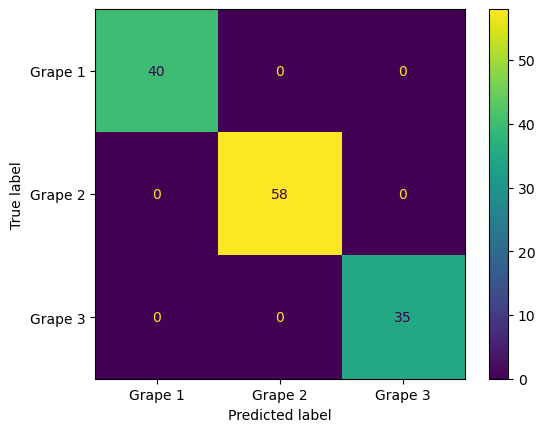

In [13]:
y_train_gbc = gbc.predict(X_train)
cm = confusion_matrix(y_train, y_train_gbc)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Grape 1', 'Grape 2', 'Grape 3']).plot()

Opetusdatassa kaikki oikein gradienttitehostuksella

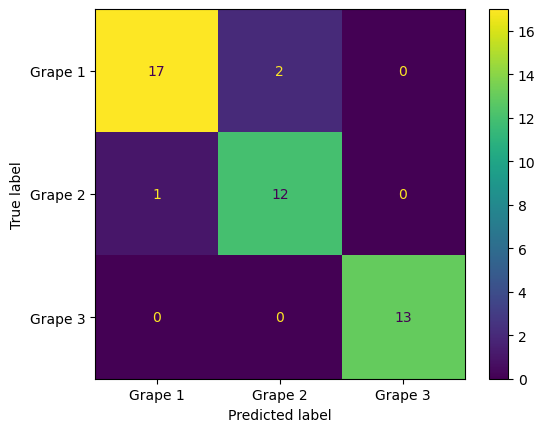

In [14]:
y_test_gbc = gbc.predict(X_test)
cm = confusion_matrix(y_test, y_test_gbc)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Grape 1', 'Grape 2', 'Grape 3']).plot()

Testidatassa yksi virhe enemmän kuin päätöspuumallissa. Molemmat mallit ovat vahvoja rypäleen ennustamisessa, mutta päätöspuu vei voiton jos oletamme, että testidatassa suoriutuminen on oleellisempaa.

In [15]:
#päätöspuumallin käyttö ennustamiseen, luodaan random sampling avulla data viidelle uudelle viinille

X = df.drop(columns=['Grape'])

num_samples = 5  
sampled_data = {}

for column in X.columns:
    sampled_data[column] = np.random.choice(X[column], num_samples)

Xnew = pd.DataFrame(sampled_data)
Xnew

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.05,1.77,2.61,22.5,88,1.25,1.22,0.22,0.83,5.64,0.75,3.31,660
1,13.56,1.51,1.92,20.5,111,2.95,2.99,0.47,1.77,4.45,1.36,3.21,1195
2,13.16,3.74,2.10,17.0,96,2.10,2.58,0.22,1.44,7.80,1.08,2.15,672
3,14.21,4.30,2.04,19.5,136,1.95,2.90,0.43,1.48,2.06,1.25,3.00,740
4,12.96,3.30,2.36,20.5,87,1.65,0.60,0.25,1.48,2.70,0.88,3.10,680


In [16]:
# Lasketaan ennusteet
ennuste = malli.predict(Xnew)

# Lasketaan todennäköisyydet
todnak = malli.predict_proba(Xnew).round(2)

# Lisätään ennusteet ja todennäköisyydet dataan
Xnew['ennuste'] = ennuste
Xnew[['Grape 1', 'Grape 2', 'Grape 3']] = todnak
Xnew

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,ennuste,Grape 1,Grape 2,Grape 3
0,13.05,1.77,2.61,22.5,88,1.25,1.22,0.22,0.83,5.64,0.75,3.31,660,3,0.0,0.0,1.0
1,13.56,1.51,1.92,20.5,111,2.95,2.99,0.47,1.77,4.45,1.36,3.21,1195,1,1.0,0.0,0.0
2,13.16,3.74,2.10,17.0,96,2.10,2.58,0.22,1.44,7.80,1.08,2.15,672,2,0.1,0.9,0.0
3,14.21,4.30,2.04,19.5,136,1.95,2.90,0.43,1.48,2.06,1.25,3.00,740,2,0.0,1.0,0.0
4,12.96,3.30,2.36,20.5,87,1.65,0.60,0.25,1.48,2.70,0.88,3.10,680,2,0.0,1.0,0.0


Ennusteen mukaan:
3x Grape 2,
1x Grape 1,
1x Grape 3

-----------------------------------------

OSA 2 - REGRESSIOMALLI

In [17]:
#tuodaan tarvittavat kirjastot lineaariseen regressioanalyysiin. Luetaan data energiatehokkuuteen vaikuttavista tekijöistä

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline

df2 = pd.read_excel(r"C:\Users\nikla\OneDrive\Työpöytä\Haaga-Helia\Data-analytiikka\Tehtävät\Tehtävä3\ENB2012_data.xlsx")
df2

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [18]:
#Lisätään sarakkeille oikeat nimet (Lähde: https://archive.ics.uci.edu/dataset/242/energy+efficiency)

column_names2 = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']
df2.columns = column_names2
df2

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


<Axes: >

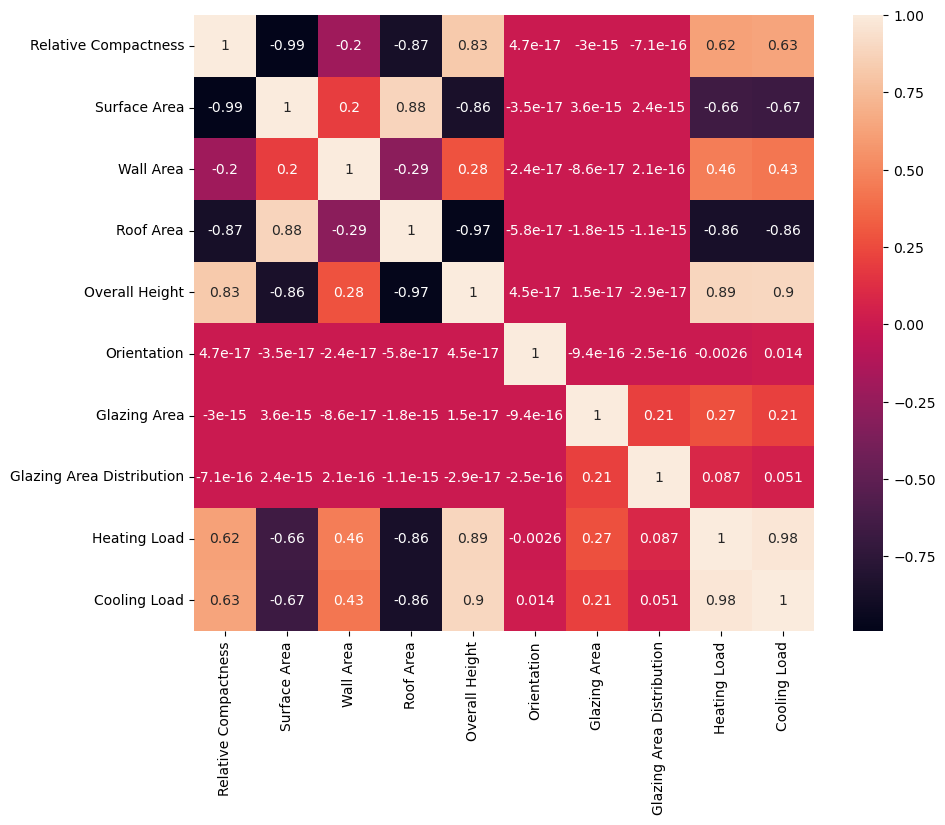

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True)

Katsotaan korrelaatioita heating load (rakennuksen lämmitysenergian tarve) näkökulmasta. Merkittävimmät korrelaatiot löydämme seuraavista muuttujista: Overall Height, Roof Area, Surface Area, Relative Compactness)

In [20]:
#Määritellään selittävät ja ennustettava muuuttuja, sovitetaan malli

X = df2[['Overall Height', 'Roof Area', 'Surface Area', 'Relative Compactness']]
y = df2['Heating Load']

malli = LinearRegression().fit(X,y)

Tarkastetaan kulmakertoimet ja selityskerroin

In [21]:
malli.coef_

array([ 4.16995371e+00, -1.21626451e-01, -2.64761432e-02, -6.47734319e+01])

In [22]:
malli.score(X,y)

0.8424443404765252

Text(0, 0.5, 'Poikkeama todellisesta')

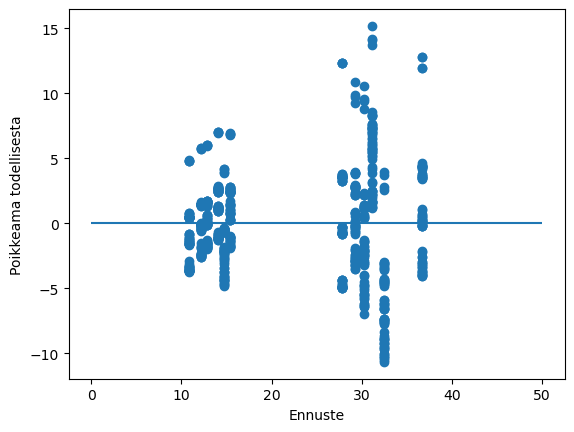

In [23]:
#Virhetermit pistekaaviona

plt.scatter(malli.predict(X), malli.predict(X) - y)

plt.hlines(y = 0, xmin = 0, xmax = 50)

plt.xlabel('Ennuste')
plt.ylabel('Poikkeama todellisesta')

Text(0, 0.5, 'Ennuste')

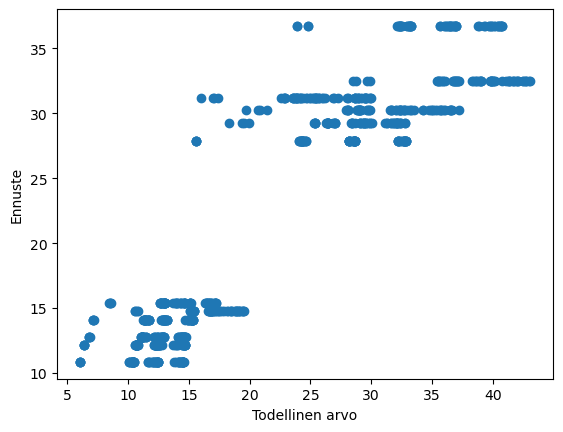

In [24]:
#Ennusteen ja todellisten arvojen vastaavuus

plt.scatter(y, malli.predict(X))

plt.xlabel('Todellinen arvo')
plt.ylabel('Ennuste')

In [25]:
# Perinteisempi regressio-statistiikka statsmodels-kirjastosta

X = sm.add_constant(X)

# Mallin sovitus (OLS = Ordinary Least Squares)
malli_sm = sm.OLS(y, X).fit()

print(malli_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           Heating Load   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     1020.
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          2.14e-304
Time:                        14:16:11   Log-Likelihood:                -2154.9
No. Observations:                 768   AIC:                             4320.
Df Residuals:                     763   BIC:                             4343.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   89.1766 

Ehtoluku (Cond. no.) on suuri, tod. näk. koska muuttujat ovat voimakkaasti korreloituneita keskenään, eli mallin on vaikea arvioida kunkin muuttujan vaikutusta tarkasti. Tähän on syytä puuttua, ja valikoida selittävät muuttujat paremmin. 

Korrelaatioiden tarkastelun jälkeen, jätetään pois "Relative Compactness" ja "Roof Area", jotka korreloivat lähes yksi yhteen jo käytettyjen muuttujien kanssa. Otetaan sen sijaan mukaan "Wall Area" ja "Glazing Area" tuomaan uutta näkökulmaa

In [26]:
#Luodaan malli uudestaan ja analysoidaan sen vahvuutta

X = df2[['Overall Height', 'Surface Area', 'Wall Area', 'Glazing Area']]
y = df2['Heating Load']

malli = LinearRegression().fit(X,y)

In [27]:
malli.score(X,y)

0.9108894046606516

Text(0, 0.5, 'Ennuste')

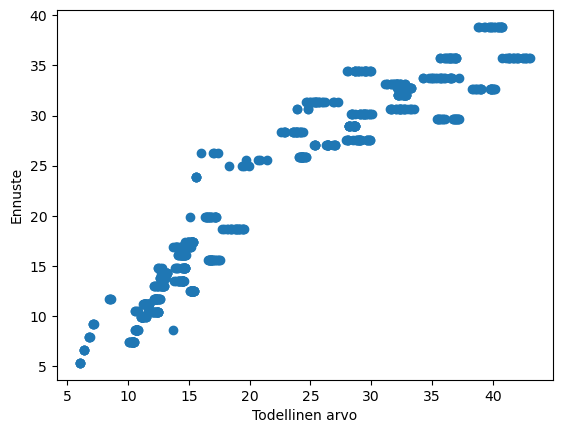

In [28]:
plt.scatter(y, malli.predict(X))

plt.xlabel('Todellinen arvo')
plt.ylabel('Ennuste')

Selityskertoin on vahvempi (n. 91 % vaihtelusta voidaan selittää selittävien muuttujien vaihtelulla. Myös virhetermit pistekaaviona näyttää johdonmukaisempaa tulosta kuin aiemmin.

In [29]:
# Perinteisempi regressio-statistiikka statsmodels-kirjastosta

X = sm.add_constant(X)

# Mallin sovitus (OLS = Ordinary Least Squares)
malli_sm = sm.OLS(y, X).fit()

print(malli_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           Heating Load   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     1950.
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:16:12   Log-Likelihood:                -1936.1
No. Observations:                 768   AIC:                             3882.
Df Residuals:                     763   BIC:                             3905.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -33.6179      3.375     -9.

Ehtoluku on edelleen liian suuri, mutta n. kuusi kertaa pienempi verrattuna aiempaan. Muut tunnusluvut mallissa ovat hyvällä tasolla (pienet p-luvut, suuret r-luvut), ja voimme todeta että malli sopii hyvin dataan ja selittävillä muuttujilla on vaikutus lämmityskuormaan.

In [30]:
#Luodaan uusia "taloja" ja kokeillaan mallia ennustamalla niiden Heating Load

X = df2[['Overall Height', 'Surface Area', 'Wall Area', 'Glazing Area']]

num_samples = 10  
sampled_data = {}

for column in X.columns:
    sampled_data[column] = np.random.choice(X[column], num_samples)

X_uudet = pd.DataFrame(sampled_data)
X_uudet

,Overall Height,Surface Area,Wall Area,Glazing Area
0,7.0,588.0,294.0,0.25
1,7.0,759.5,343.0,0.40
2,7.0,759.5,294.0,0.25
3,3.5,588.0,367.5,0.40
4,3.5,637.0,318.5,0.40
5,3.5,588.0,318.5,0.25
6,7.0,686.0,343.0,0.40
7,7.0,661.5,416.5,0.40
8,3.5,686.0,367.5,0.40
9,3.5,637.0,367.5,0.25


In [31]:
X_uudet['Heating Load Prediction'] = malli.predict(X_uudet)
X_uudet

,Overall Height,Surface Area,Wall Area,Glazing Area,Heating Load Prediction
0,7.0,588.0,294.0,0.25,30.111868
1,7.0,759.5,343.0,0.40,37.626159
2,7.0,759.5,294.0,0.25,32.750161
3,3.5,588.0,367.5,0.40,16.536580
4,3.5,637.0,318.5,0.40,15.480074
5,3.5,588.0,318.5,0.25,11.660581
6,7.0,686.0,343.0,0.40,36.495462
7,7.0,661.5,416.5,0.40,38.834019
8,3.5,686.0,367.5,0.40,18.044176
9,3.5,637.0,367.5,0.25,14.224682


Luotujen talojen Heating Load vaihtelee ennusteen mukaan 9.57 - 38.83 välillä